In [1]:
# useful math functions
from math import pi

# importing QISKit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

In [2]:
backend = Aer.get_backend('qasm_simulator') # the device to run on
shots = 1024    # the number of shots in the experiment 

#to record the rotation number for encoding 00, 10, 11, 01
rotationNumbers = {"00":1, "10":3, "11":5, "01":7}
rotationList = ['00', '01', '10', '11']
positionList = ['First', 'Second']
# Creating registers

# qubit for encoding 2 bits of information
qr = QuantumRegister(1)

# cbit for recording the measurement of the qubit
cr = ClassicalRegister(1)

# dictionary for encoding circuits
encodingCircuits = {}
# Quantum circuits for encoding 00, 10, 11, 01
for bit in rotationList:
    circuitName = "Encode"+ bit
    encodingCircuits[circuitName] = QuantumCircuit(qr, cr, name=circuitName)
    encodingCircuits[circuitName].u3(rotationNumbers[bit]*pi/4.0, 0, 0, qr[0])
    encodingCircuits[circuitName].barrier()

# dictionary for decoding circuits
decodingCircuits = {}
# Quantum circuits for decoding the first and second bit
for pos in positionList:
    circuitName = "Decode"+pos
    decodingCircuits[circuitName] = QuantumCircuit(qr, cr, name=circuitName)
    if pos == "Second": #if pos == "First" we can directly measure
        decodingCircuits[circuitName].h(qr[0])
    decodingCircuits[circuitName].measure(qr[0], cr[0])

#combine encoding and decoding of QRACs to get a list of complete circuits
circuitNames = []
circuits = []
for k1 in encodingCircuits.keys():
    for k2 in decodingCircuits.keys():
        circuitNames.append(k1+k2)
        circuits.append(encodingCircuits[k1]+decodingCircuits[k2])

print("List of circuit names:", circuitNames) #list of circuit names

List of circuit names: ['Encode00DecodeFirst', 'Encode00DecodeSecond', 'Encode01DecodeFirst', 'Encode01DecodeSecond', 'Encode10DecodeFirst', 'Encode10DecodeSecond', 'Encode11DecodeFirst', 'Encode11DecodeSecond']


/var/folders/bf/_nrjpw3d0qj07jxnm2dzyyc00000gn/T/ipykernel_94491/2428588338.py:26: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  encodingCircuits[circuitName].u3(rotationNumbers[bit]*pi/4.0, 0, 0, qr[0])
/var/folders/bf/_nrjpw3d0qj07jxnm2dzyyc00000gn/T/ipykernel_94491/2428588338.py:45: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuits.append(encodingCircuits[k1]+decodingCircuits[k2])


In [11]:
job = execute(circuits, backend=backend, shots=shots)
results = job.result()
print("Experimental Result of Encode01DecodeFirst")
#We should measure "0" with probability 0.85
circuits[circuitNames.index("Encode01DecodeFirst")].draw()

Experimental Result of Encode01DecodeFirst


┌──────────────┐ ░ ┌─┐
  q0: ┤ U3(7π/4,0,0) ├─░─┤M├
      └──────────────┘ ░ └╥┘
c0: 1/════════════════════╩═
                          0

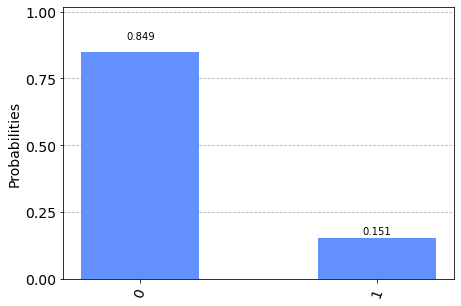

In [12]:
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode01DecodeFirst")]))

In [ ]:
print("Experimental Result of Encode01DecodeSecond")
#We should measure "1" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode01DecodeSecond")]))
print("Experimental Result of Encode11DecodeFirst")
#We should measure "1" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode11DecodeFirst")]))
print("Experimental Result of Encode11DecodeSecond")
#We should measure "1" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode11DecodeSecond")]))

In [5]:
# Use the IBM Quantum Experience
# backend = least_busy(IBMQ.backends(simulator=False))
job_exp = execute(circuits, backend=backend, shots=shots)
job_monitor(job_exp)

Job Status: job has successfully run


Experimental Result of Encode01DecodeFirst


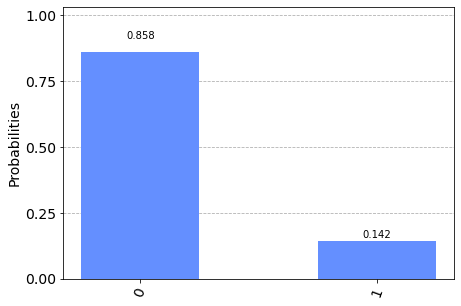

In [6]:
results = job_exp.result()
print("Experimental Result of Encode01DecodeFirst")
#We should measure "0" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode01DecodeFirst")]))

Experimental Result of Encode01DecodeSecond


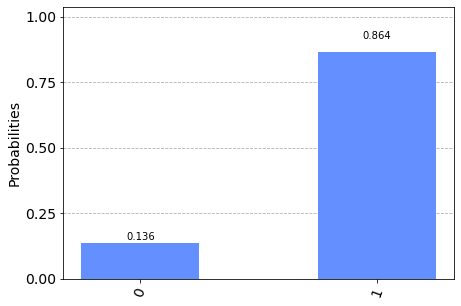

In [7]:
print("Experimental Result of Encode01DecodeSecond")
#We should measure "1" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode01DecodeSecond")]))